In [1]:
import numpy as np
from scipy.ndimage import laplace
import matplotlib.pyplot as plt

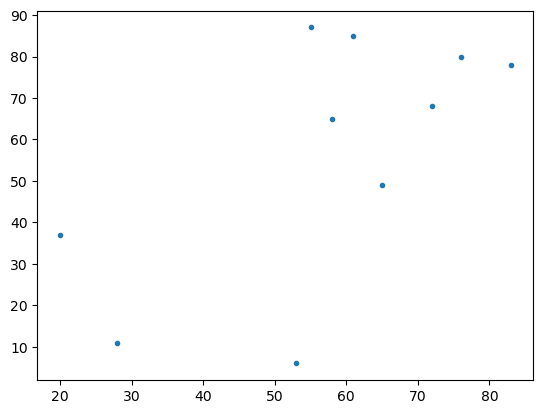

In [2]:
pos = np.random.randint(0, 99, (10,2))
plt.plot(pos[:,0], pos[:,1], '.')

In [3]:
u0 = np.zeros((100,100))
def dudt(u, t, pos, phi, kappa, dx):
    du = np.zeros((100,100))
    du[pos[:,0], pos[:,1]] = phi
    u = u.reshape((100,100))
    delu = laplace(u, mode='mirror')
    du += kappa * delu / dx / dx
    return du.ravel()

from scipy.integrate import odeint

phi = 1
kappa = 1e-10
dx = 1e-2 / 100
t = np.linspace(0, 24 * 60 * 60, 200)
u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,dx))

In [4]:
u.shape

(200, 10000)

In [5]:
u = u.reshape((200,100,100))

In [6]:
umax = u.max()
uthresh = u - umax * 0.75
for p in pos:
    zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
    print(zero_crossings)


[165]
[]
[116]
[133]
[]
[]
[134]
[]
[127]
[113]


In [8]:
for t in range(200):
    plt.imshow(uthresh[t,:,:]>0, origin='lower')
    plt.plot(pos[:,1], pos[:,0], 'w+')
    plt.colorbar()
    plt.savefig('pad_diffusion/diffusion_%04d.png'%t)
    plt.close()

In [9]:
t0 = np.zeros((100,100)) + np.nan
for x in range(100):
    for y in range(100):
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,x,y]), axis=0))[0]
        if len(zero_crossings)>0:
            t0[x,y] = zero_crossings[0]

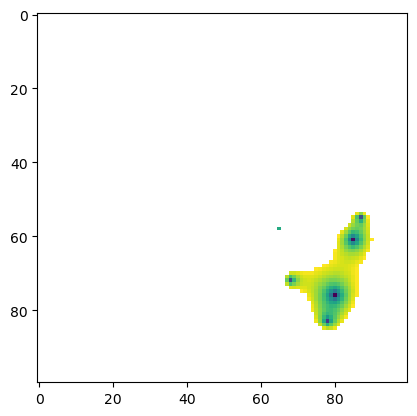

In [10]:
plt.imshow(t0)